In [2]:
#libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df_og = pd.read_csv('train.csv')

In [4]:
X = df_og.drop('SalePrice', axis=1)
y = df_og['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9,random_state=42)

df = pd.concat([X_train,y_train],axis=1)

---
## Transfomations:

In [5]:
# rename the columns names using lower case and replace space with '_'

def rename_columns(df):
    df.columns = [columns.lower().replace(" ","_") for columns in df.columns]
    return df
df = rename_columns(df)

In [6]:
# add 1st_flr_sf and 2nd_flr_sf and create a new column total_sf
def create_total_sf(df):
    df['total_sf'] = df['1st_flr_sf'] + df['2nd_flr_sf']
    return df

df = create_total_sf(df)

---
### ms_subclass
* There is no significant evidence that ms_subclass is correlated with saleprice

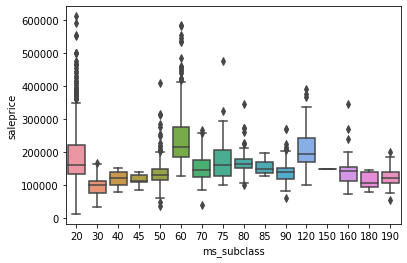

In [7]:
sns.boxplot(df['ms_subclass'],df['saleprice']);

___
### ms_zoning
* no There is no significant evidence that ms_zonning is correlated with saleprice

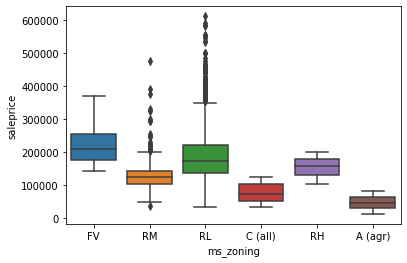

In [8]:
sns.boxplot(y=df['saleprice'],x = df['ms_zoning']);

___
### lot_frontage
* not very strong correlation

In [9]:
df[['lot_frontage','saleprice']].corr()

,lot_frontage,saleprice
lot_frontage,1.00000,0.33956
saleprice,0.33956,1.00000


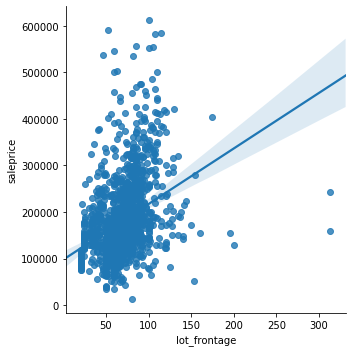

In [11]:
sns.lmplot('lot_frontage','saleprice',data=df);

___
### lot_area
* not very very correlation

In [12]:
df[['lot_area','saleprice']].corr()

,lot_area,saleprice
lot_area,1.00000,0.29388
saleprice,0.29388,1.00000


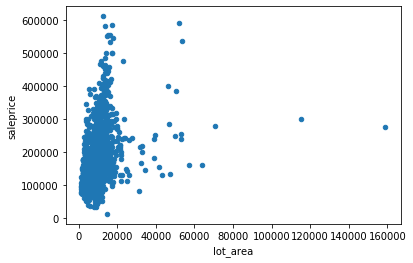

In [13]:
df.plot('lot_area','saleprice',kind='scatter');

---
### street
* only 6 observations having grvl, and the diffrence between two boxplots are not ver clear

In [14]:
df['street'].value_counts(dropna=False)

Pave    1839
Grvl       6
Name: street, dtype: int64

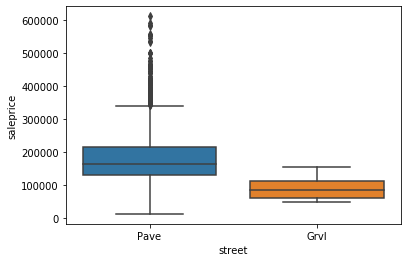

In [15]:
sns.boxplot(y=df['saleprice'],x = df['street']);

---
### alley
* A lot of missing values

In [16]:
df['alley'].value_counts(dropna=False)

NaN     1713
Grvl      80
Pave      52
Name: alley, dtype: int64

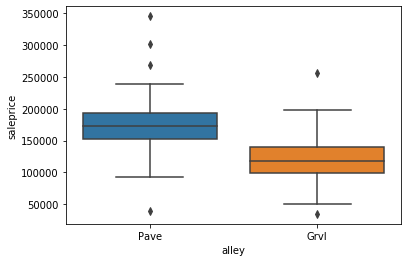

In [17]:
sns.boxplot(y=df['saleprice'],x = df['alley']);

---
### lot_shape
* median price for different lot shapes doesn't differ too much and extremly inbalanced

In [18]:
df['lot_shape'].value_counts(dropna=False)

Reg    1170
IR1     619
IR2      47
IR3       9
Name: lot_shape, dtype: int64

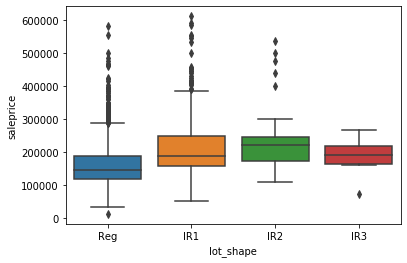

In [19]:
sns.boxplot(y=df['saleprice'],x = df['lot_shape'])

---
### land_contour
* same as last one

In [20]:
df['land_contour'].value_counts(dropna=False)

Lvl    1656
HLS      76
Bnk      72
Low      41
Name: land_contour, dtype: int64

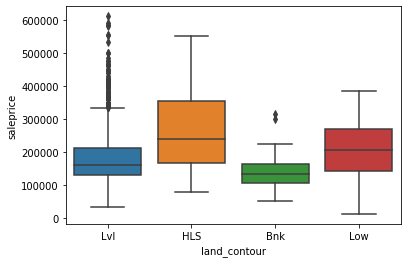

In [21]:
sns.boxplot(y=df['saleprice'],x = df['land_contour'])

---
### utilities
* extremly unbalanced

In [22]:
df['utilities'].value_counts(dropna=False)

AllPub    1845
Name: utilities, dtype: int64

---
### lot_config
* avg price have little different

In [23]:
df['lot_config'].value_counts(dropna=False)

Inside     1353
Corner      318
CulDSac     114
FR2          52
FR3           8
Name: lot_config, dtype: int64

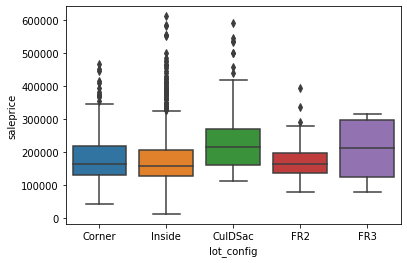

In [24]:
sns.boxplot(y=df['saleprice'],x = df['lot_config']);

---
### land_slope
* avg price have little different

In [25]:
df['land_slope'].value_counts(dropna=False)

Gtl    1753
Mod      82
Sev      10
Name: land_slope, dtype: int64

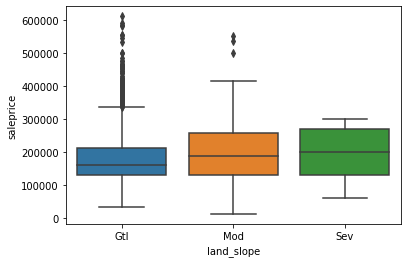

In [26]:
sns.boxplot(y=df['saleprice'],x = df['land_slope']);

---
### neighborhood


In [27]:
# df['neighborhood'].value_counts(dropna=False)

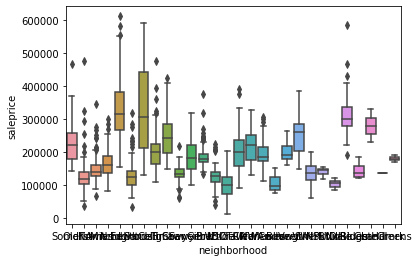

In [28]:
sns.boxplot(y=df['saleprice'],x = df['neighborhood']);

---
### condition_1 & condition 2
* extremly inbalanced

In [29]:
df['condition_1'].value_counts(dropna=False)

Norm      1582
Feedr      101
Artery      64
RRAn        34
PosN        24
RRAe        20
PosA        11
RRNn         6
RRNe         3
Name: condition_1, dtype: int64

In [30]:
df['condition_2'].value_counts(dropna=False)

Norm      1821
Feedr       11
Artery       5
PosA         3
RRNn         2
PosN         2
RRAn         1
Name: condition_2, dtype: int64

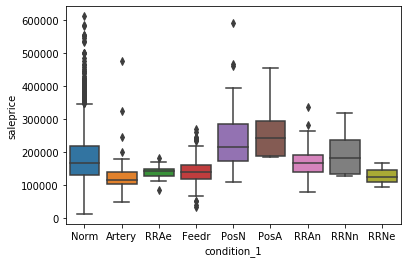

In [31]:
sns.boxplot(y=df['saleprice'],x = df['condition_1']);

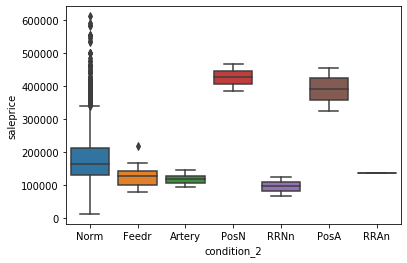

In [32]:
sns.boxplot(y=df['saleprice'],x = df['condition_2']);

---
### BldgType

In [33]:
# df['bldg_type'].value_counts(dropna=False)

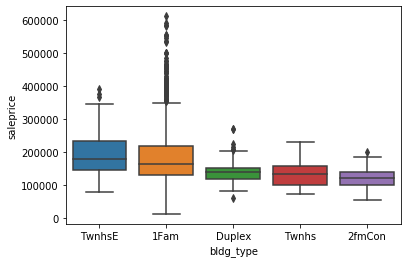

In [34]:
sns.boxplot(y=df['saleprice'],x = df['bldg_type']);

---
### house_style
* Highly correlated with saleprice

In [35]:
df['house_style'].value_counts(dropna=False)

1Story    949
2Story    540
1.5Fin    198
SLvl       82
SFoyer     47
2.5Unf     13
1.5Unf     10
2.5Fin      6
Name: house_style, dtype: int64

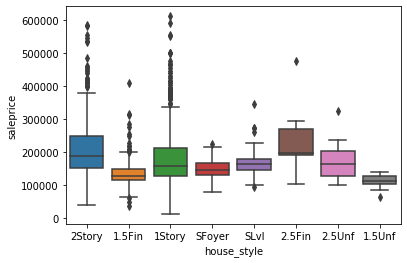

In [36]:
sns.boxplot(y=df['saleprice'],x = df['house_style']);

---
### OverallQual
* Highly correlated with saleprice

In [37]:
df[['overall_qual','saleprice']].corr()

,overall_qual,saleprice
overall_qual,1.000000,0.799344
saleprice,0.799344,1.000000


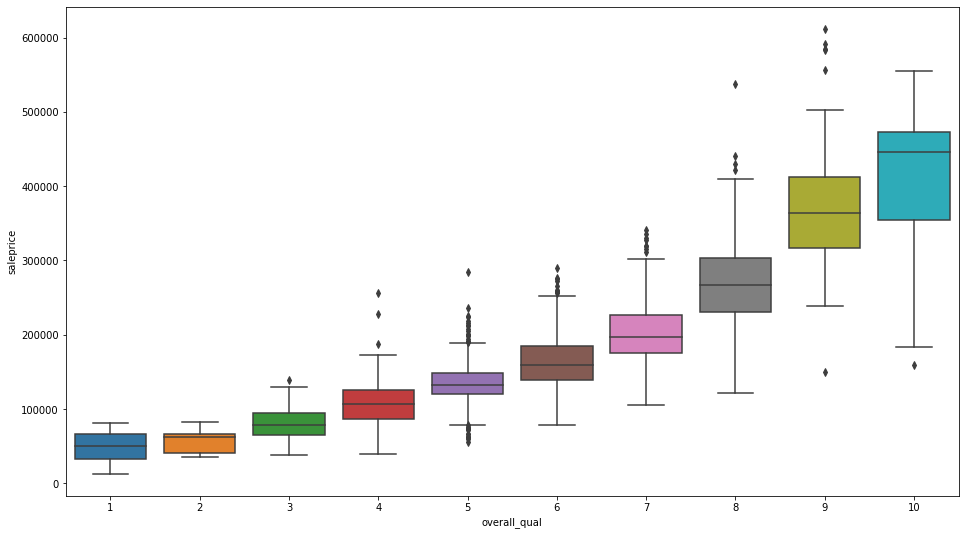

In [38]:
plt.figure(figsize=(16,9))
sns.boxplot(y=df['saleprice'],x = df['overall_qual']);

---
### OverallCond
* when cond is above 5 then the price pretty doesn't vary too much

In [26]:
df[['overall_cond','saleprice']].corr()

,overall_cond,saleprice
overall_cond,1.000000,-0.103628
saleprice,-0.103628,1.000000


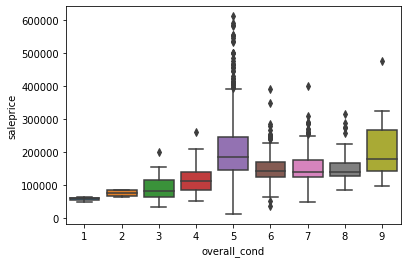

In [95]:
sns.boxplot(y=df['saleprice'],x = df['overall_cond']);

In [35]:
df_new = df.copy()
df_new['overall'] = df_new['overall_qual'] + df_new['overall_cond']

In [36]:
df_new[['overall_cond','saleprice']].corr()

,overall_cond,saleprice
overall_cond,1.000000,-0.103628
saleprice,-0.103628,1.000000


In [37]:
df_new[['overall','saleprice']].corr()

,overall,saleprice
overall,1.000000,0.597016
saleprice,0.597016,1.000000


In [38]:
df_new[['overall','overall_qual']].corr()

,overall,overall_qual
overall,1.000000,0.768456
overall_qual,0.768456,1.000000


---
### year_built

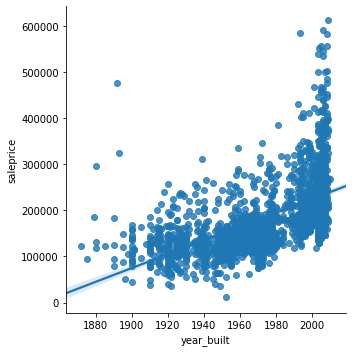

In [41]:
sns.lmplot('year_built','saleprice',data=df);

---
### year_remod/add

* correlated with price with power 2, and no differences between house with/without remod

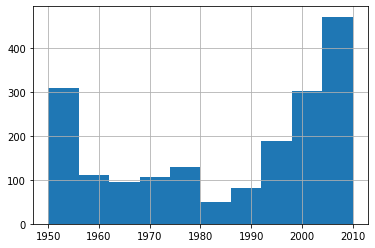

In [47]:
df['year_remod/add'].hist();

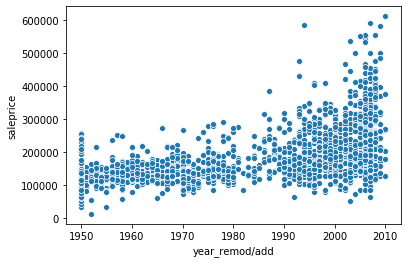

In [48]:
sns.scatterplot(df['year_remod/add'],df['saleprice']);

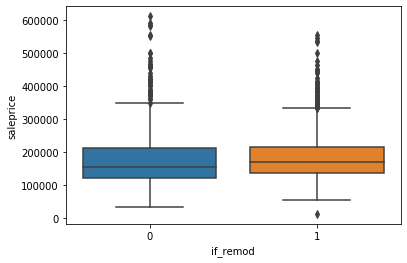

In [50]:
df_test = df.copy()

# build a new column: 1 mean had been remoded, o means not
def if_remod(values):
    if values['year_remod/add'] == values['year_built']:
        return 1
    else:
        return 0
    
df_test['if_remod'] = df_test.apply(if_remod,axis=1)

sns.boxplot(y=df_test['saleprice'],x = df_test['if_remod']);

---
### roof_style
* pretty much same average price, no significant evidence found

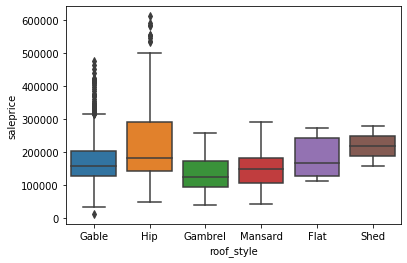

In [51]:
sns.boxplot(y=df['saleprice'],x = df['roof_style']);

---
### roof_matl
* supper unbalanced as well

In [54]:
# df['roof_matl'].value_counts()

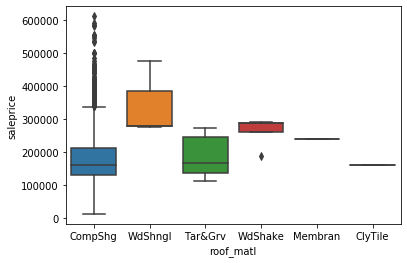

In [55]:
sns.boxplot(y=df['saleprice'],x = df['roof_matl']);

---
### exterior_1st & 2nd
* each house has more than 1 exterior

In [58]:
# df['exterior_1st'].value_counts(), df['exterior_2nd'].value_counts()

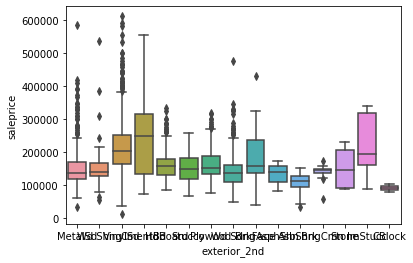

In [57]:
sns.boxplot(y=df['saleprice'],x = df['exterior_2nd']);

---
### mas_vnr_type
* stone ones might little bit higher.

In [59]:
df['mas_vnr_type'].value_counts()

None       1098
BrkFace     565
Stone       151
BrkCmn       12
Name: mas_vnr_type, dtype: int64

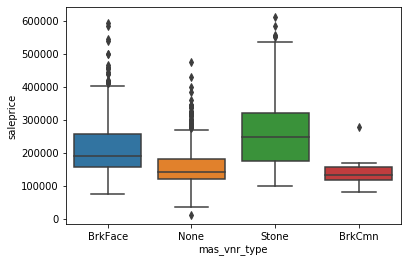

In [60]:
sns.boxplot(y=df['saleprice'],x = df['mas_vnr_type']);

---
### mas_vnr_area
* exponential distribution

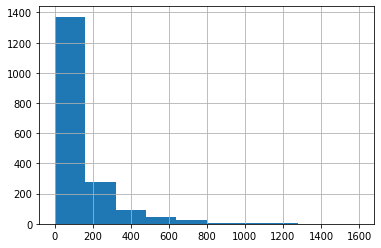

In [61]:
df['mas_vnr_area'].hist();

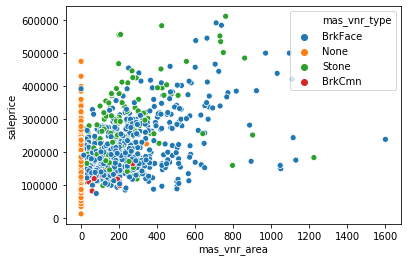

In [63]:
sns.scatterplot(df['mas_vnr_area'],df['saleprice'], hue=df['mas_vnr_type']);

---
### exter_qual
* slightly positively correlated

In [65]:
df['exter_qual'].value_counts(dropna=False)

TA    1120
Gd     628
Ex      74
Fa      23
Name: exter_qual, dtype: int64

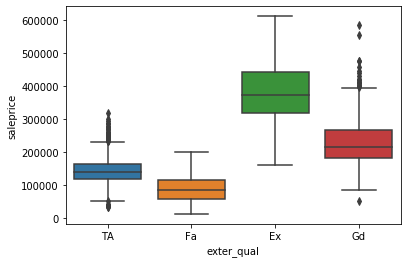

In [66]:
sns.boxplot(y=df['saleprice'],x = df['exter_qual']);

---
### exter_cond

In [67]:
df['exter_cond'].value_counts(dropna=False)

TA    1599
Gd     195
Fa      43
Ex       6
Po       2
Name: exter_cond, dtype: int64

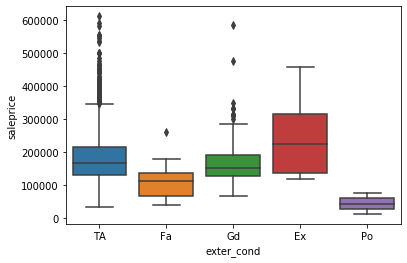

In [68]:
sns.boxplot(y=df['saleprice'],x = df['exter_cond']);

---
### foundation

In [71]:
df['foundation'].value_counts(dropna=False)

PConc     840
CBlock    768
BrkTil    202
Slab       28
Stone       5
Wood        2
Name: foundation, dtype: int64

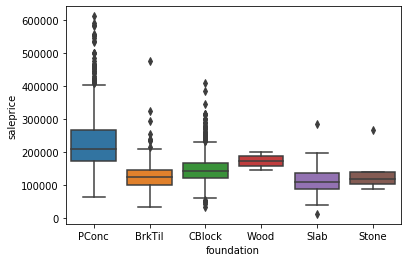

In [72]:
sns.boxplot(y=df['saleprice'],x = df['foundation']);

---
### bsmt_qual
* correalted

In [73]:
df['bsmt_qual'].value_counts(dropna=False)

Gd     796
TA     788
Ex     161
Fa      54
NaN     45
Po       1
Name: bsmt_qual, dtype: int64

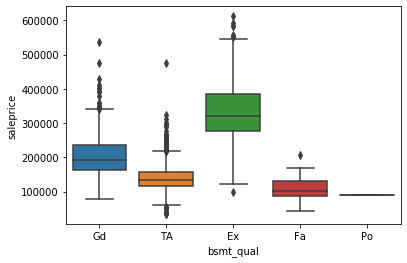

In [75]:
sns.boxplot(y=df['saleprice'],x = df['bsmt_qual']);

---
### bsmt_cond
* so so

In [76]:
df['bsmt_cond'].value_counts()

TA    1650
Gd      83
Fa      59
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

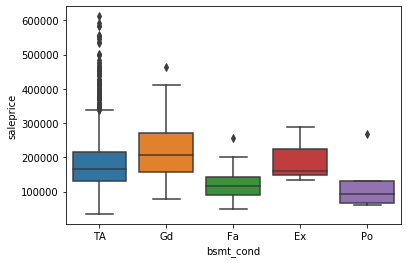

In [77]:
sns.boxplot(y=df['saleprice'],x = df['bsmt_cond']);

---
### bsmt_exposure
* tiny correlated

In [78]:
df['bsmt_exposure'].value_counts()

No    1207
Av     259
Gd     180
Mn     151
Name: bsmt_exposure, dtype: int64

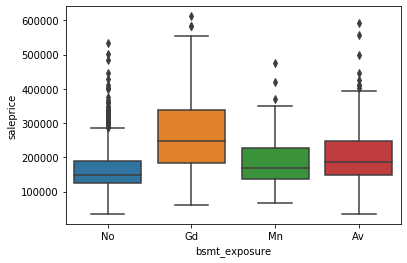

In [79]:
sns.boxplot(y=df['saleprice'],x = df['bsmt_exposure']);

---
### bsmtfin_type_1 & 2 bsmtfin_sf_1 & 2

In [80]:
df['bsmtfin_type_1'].value_counts(dropna=False),df['bsmtfin_type_2'].value_counts(dropna=False)

(GLQ    564
 Unf    544
 ALQ    253
 BLQ    176
 Rec    169
 LwQ     94
 NaN     45
 Name: bsmtfin_type_1, dtype: int64, Unf    1586
 Rec      66
 LwQ      53
 NaN      46
 BLQ      42
 ALQ      31
 GLQ      21
 Name: bsmtfin_type_2, dtype: int64)

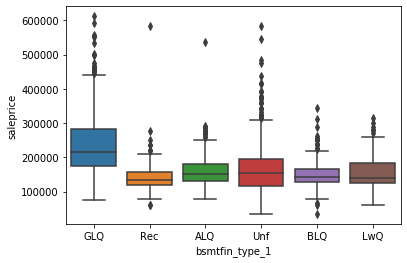

In [81]:
sns.boxplot(y=df['saleprice'],x = df['bsmtfin_type_1']);

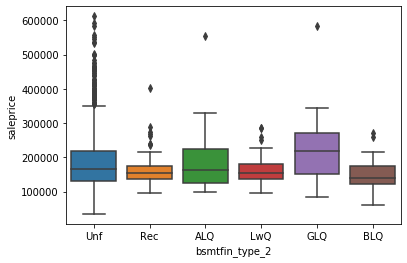

In [82]:
sns.boxplot(y=df['saleprice'],x = df['bsmtfin_type_2']);

---
### bsmt_unf_sf

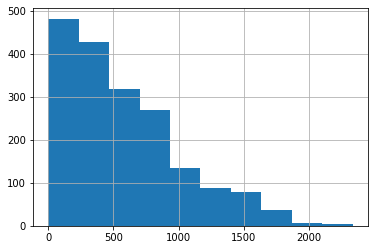

In [83]:
df['bsmt_unf_sf'].hist()

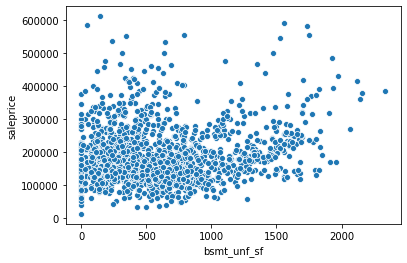

In [84]:
sns.scatterplot(df['bsmt_unf_sf'],df['saleprice']);

---
### total_bsmt_sf
* highly correlated with price with outliers

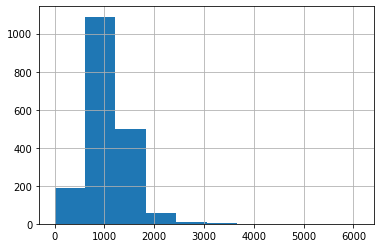

In [85]:
df['total_bsmt_sf'].hist()

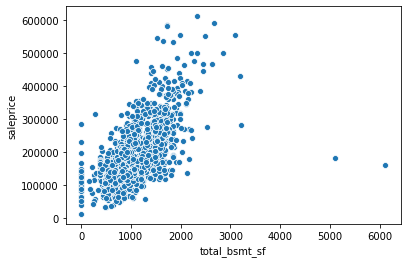

In [86]:
sns.scatterplot(df['total_bsmt_sf'],df['saleprice']);

---
### heating

In [87]:
df['heating'].value_counts(dropna=False)

GasA    1818
GasW      17
Grav       5
Wall       3
OthW       2
Name: heating, dtype: int64

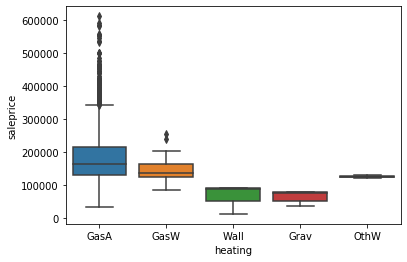

In [88]:
sns.boxplot(y=df['saleprice'],x = df['heating']);

---
### heating_qc

In [89]:
df['heating_qc'].value_counts()

Ex    951
TA    535
Gd    293
Fa     63
Po      3
Name: heating_qc, dtype: int64

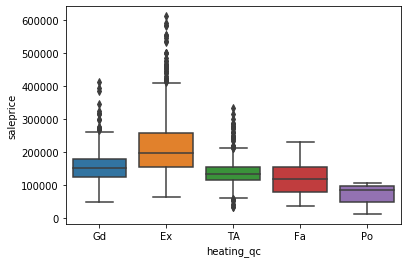

In [90]:
sns.boxplot(y=df['saleprice'],x = df['heating_qc']);

---
### central_air

In [91]:
df['central_air'].value_counts(dropna=False)

Y    1721
N     124
Name: central_air, dtype: int64

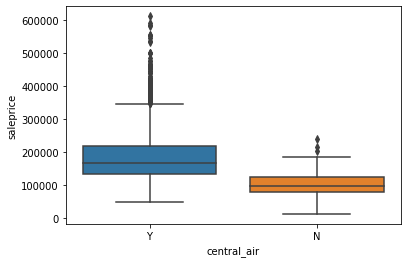

In [92]:
sns.boxplot(y=df['saleprice'],x = df['central_air']);

---
### electrical

In [93]:
df['electrical'].value_counts(dropna=False)

SBrkr    1681
FuseA     124
FuseF      32
FuseP       7
Mix         1
Name: electrical, dtype: int64

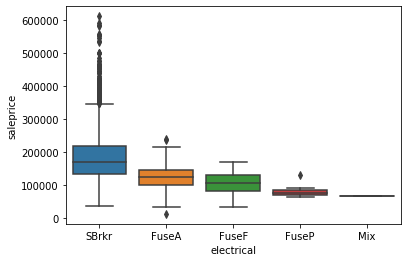

In [94]:
sns.boxplot(y=df['saleprice'],x = df['electrical']);

---
### 1st_flr_sf & 2nd_flr_sf

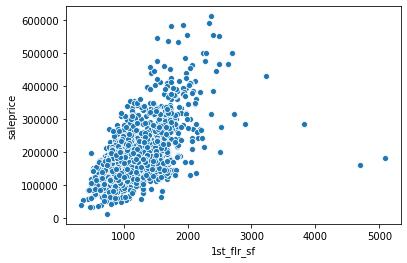

In [95]:
sns.scatterplot(df['1st_flr_sf'],df['saleprice']);

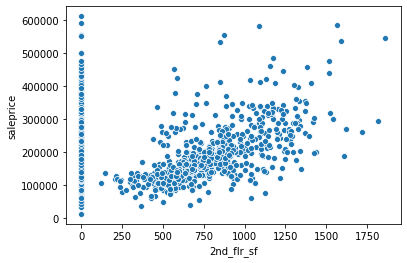

In [96]:
sns.scatterplot(df['2nd_flr_sf'],df['saleprice']);

In [97]:
df_test['total_sf'] = df_test['1st_flr_sf'] + df['2nd_flr_sf']

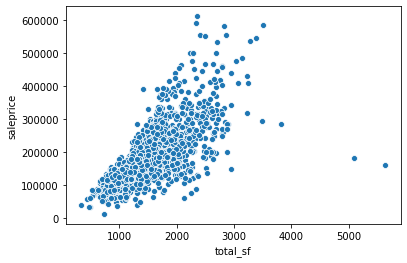

In [98]:
sns.scatterplot(df_test['total_sf'],df_test['saleprice']);

---
### low_qual_fin_sf

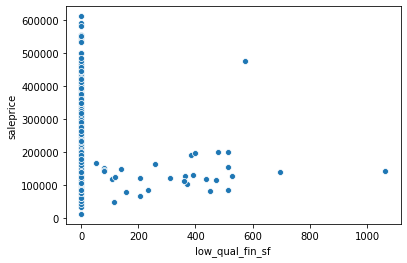

In [99]:
sns.scatterplot(df['low_qual_fin_sf'],df['saleprice']);

---
### gr_liv_area
* highly correlated

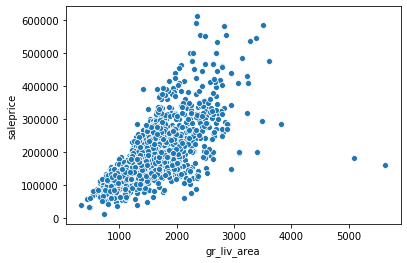

In [102]:
sns.scatterplot('gr_liv_area','saleprice',data=df)

---
### bsmt_full_bath
* correlated but unbalanced
* checked with gr_liv_area, not correlated

In [103]:
df['bsmt_full_bath'].value_counts(dropna=False)

0.0    1078
1.0     741
2.0      22
3.0       2
NaN       2
Name: bsmt_full_bath, dtype: int64

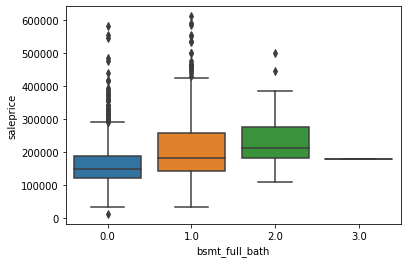

In [104]:
sns.boxplot(y=df['saleprice'],x = df['bsmt_full_bath']);

---
### bsmt_half_bath
* checked half + full, lower corr

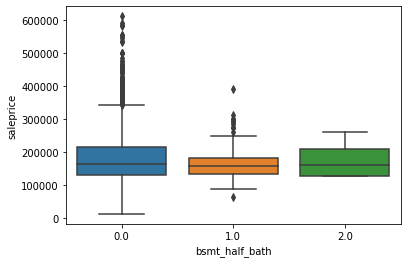

In [106]:
sns.boxplot(y=df['saleprice'],x = df['bsmt_half_bath']);

---
### full_bath
* highly correlated with total_sf

In [107]:
df['full_bath'].value_counts(dropna=False)

2    988
1    804
3     43
0      8
4      2
Name: full_bath, dtype: int64

In [108]:
df[['full_bath','saleprice']].corr()

,full_bath,saleprice
full_bath,1.000000,0.539447
saleprice,0.539447,1.000000


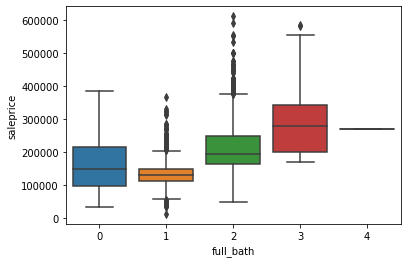

In [109]:
sns.boxplot(y=df['saleprice'],x = df['full_bath']);

---
### half_bath
* same as bsmt_half_bath

In [111]:
df[['half_bath','saleprice']].corr()

,half_bath,saleprice
half_bath,1.000000,0.287197
saleprice,0.287197,1.000000


---
### bedroom_abvgr 

In [112]:
df['bedroom_abvgr'].value_counts(dropna=False)

3    998
2    489
4    235
1     68
5     39
6     10
0      5
8      1
Name: bedroom_abvgr, dtype: int64

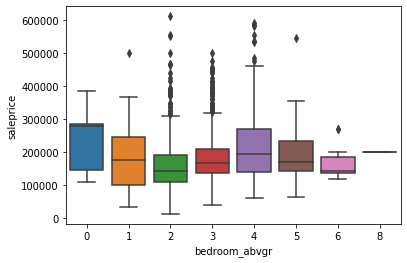

In [114]:
sns.boxplot(y=df['saleprice'],x = df['bedroom_abvgr']);

---
### kitchen_abvgr

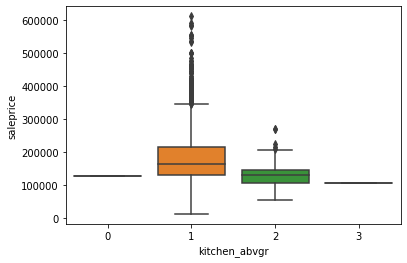

In [115]:
sns.boxplot(y=df['saleprice'],x = df['kitchen_abvgr']);

---
### kitchen_qual
* highly correlated

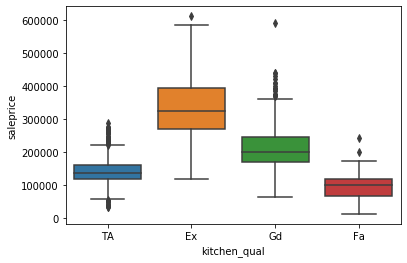

In [116]:
sns.boxplot(y=df['saleprice'],x = df['kitchen_qual']);

---
### totrms_abvgrd
* highly correlated

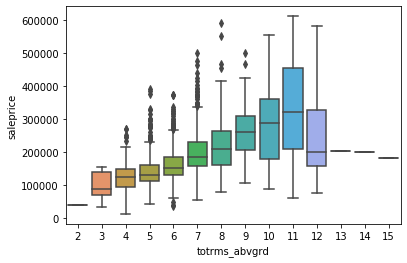

In [117]:
sns.boxplot(y=df['saleprice'],x = df['totrms_abvgrd']);

In [118]:
df[['totrms_abvgrd','saleprice']].corr()

,totrms_abvgrd,saleprice
totrms_abvgrd,1.00000,0.51126
saleprice,0.51126,1.00000


---
### functional

In [119]:
df['functional'].value_counts(dropna=False)

Typ     1721
Min1      37
Min2      37
Mod       28
Maj1      12
Maj2       6
Sal        2
Sev        2
Name: functional, dtype: int64

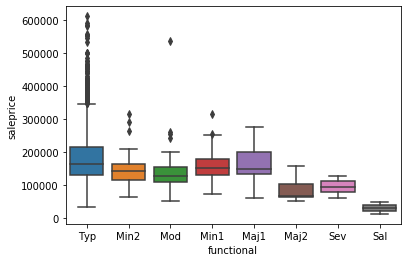

In [120]:
sns.boxplot(y=df['saleprice'],x = df['functional']);

---
### fireplaces
* correlated but also little correalate with total_sf

In [121]:
df['fireplaces'].value_counts(dropna=False)

0    899
1    806
2    134
3      5
4      1
Name: fireplaces, dtype: int64

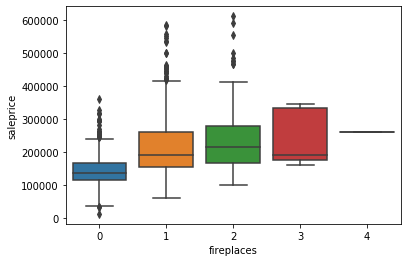

In [122]:
sns.boxplot(y=df['saleprice'],x = df['fireplaces']);

In [135]:
df[['fireplaces','saleprice']].corr()

,fireplaces,saleprice
fireplaces,1.000000,0.466501
saleprice,0.466501,1.000000


---
### fireplace_qu
* engineering with firceplaces may be useful

In [123]:
df['fireplace_qu'].value_counts(dropna=False)

NaN    899
Gd     471
TA     370
Fa      54
Ex      27
Po      24
Name: fireplace_qu, dtype: int64

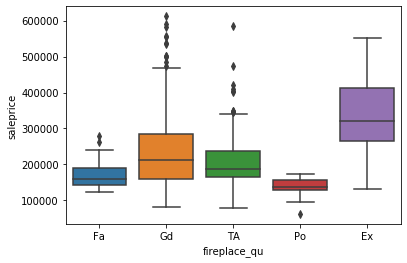

In [124]:
sns.boxplot(y=df['saleprice'],x = df['fireplace_qu']);

---
### garage_type

In [125]:
df['garage_type'].value_counts(dropna=False)

Attchd     1099
Detchd      479
BuiltIn     118
NaN         102
Basment      23
2Types       16
CarPort       8
Name: garage_type, dtype: int64

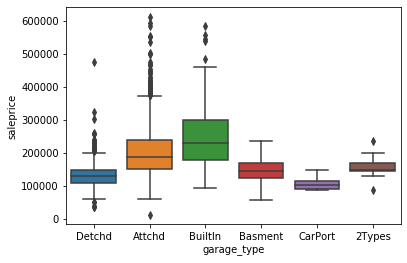

In [126]:
sns.boxplot(y=df['saleprice'],x = df['garage_type']);

---
### garage_yr_blt
* highly correlated with year_built

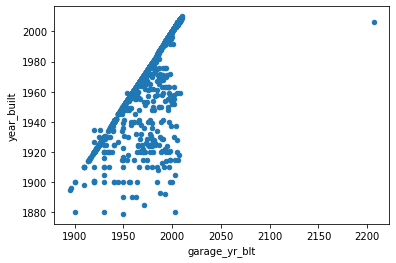

In [127]:
df[['garage_yr_blt','year_built']].plot('garage_yr_blt','year_built',kind='scatter');

---
### garage_finish
* there might be huge difference for finished and unfinished. try a new group with finish(rfn+fin) & unfinish(Unf+na)

In [128]:
df['garage_finish'].value_counts(dropna=False)

Unf    759
RFn    523
Fin    461
NaN    102
Name: garage_finish, dtype: int64

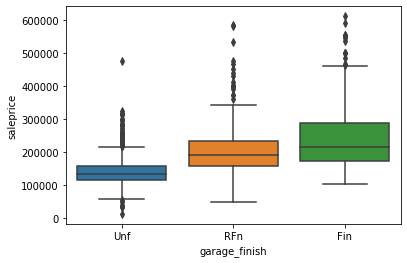

In [129]:
sns.boxplot(y=df['saleprice'],x = df['garage_finish']);

In [153]:
df_new['garage_finish_new'] = df['garage_finish'].copy()
df_new['garage_finish_new'].fillna('a',inplace=True)
df_new['garage_finish_new'] = df_new['garage_finish_new'].map({'Unf':2,'RFn':3,'Fin':4,'a':1})

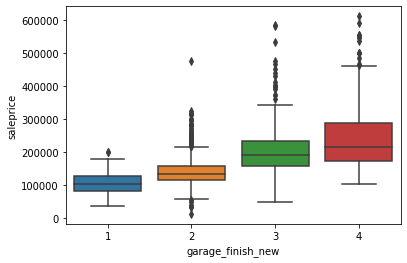

In [155]:
sns.boxplot(y=df_new['saleprice'],x = df_new['garage_finish_new']);

---
### garage_cars
* kind of correlated with total_sf but can give it a try

In [156]:
df['garage_cars'].value_counts(dropna=False)

2.0    1017
1.0     470
3.0     243
0.0     102
4.0      12
5.0       1
Name: garage_cars, dtype: int64

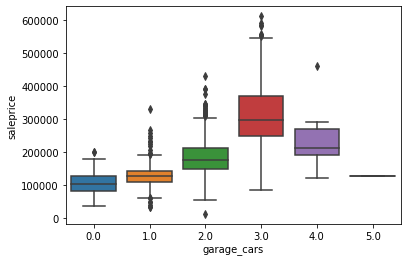

In [157]:
sns.boxplot(y=df['saleprice'],x = df['garage_cars']);

In [161]:
df[['garage_cars','saleprice']].corr()

,garage_cars,saleprice
garage_cars,1.000000,0.650607
saleprice,0.650607,1.000000


In [160]:
df_new[['garage_finish_new','garage_cars']].corr()

,garage_finish_new,garage_cars
garage_finish_new,1.000000,0.576651
garage_cars,0.576651,1.000000


---
### garage_area
* engineering with garage_cars or other garage variable may be better
* not correlated with total_area

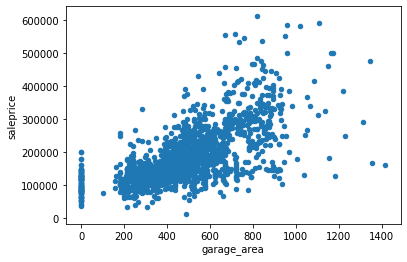

In [162]:
df.plot('garage_area','saleprice',kind='scatter')

In [164]:
df_new['garage_area_log'] = np.log(df_new['garage_area'])

/Users/czc/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


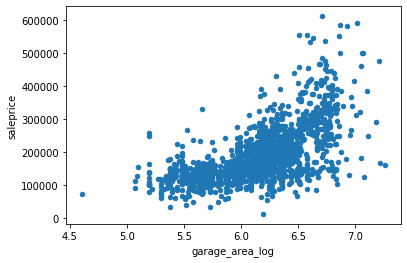

In [165]:
df_new.plot('garage_area_log','saleprice',kind='scatter')

---
### garage_qual
* interesting,hold

In [166]:
df['garage_qual'].value_counts(dropna=False)

TA     1644
NaN     102
Fa       77
Gd       17
Ex        3
Po        2
Name: garage_qual, dtype: int64

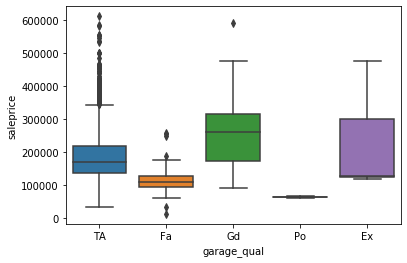

In [167]:
sns.boxplot(y=df['saleprice'],x = df['garage_qual']);

---
### garage_cond

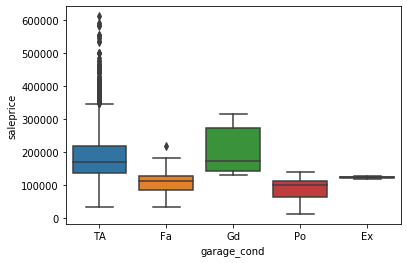

In [168]:
sns.boxplot(y=df['saleprice'],x = df['garage_cond']);

---
### paved_drive
* N is way lower than others

In [169]:
df['paved_drive'].value_counts(dropna=False)

Y    1674
N     135
P      36
Name: paved_drive, dtype: int64

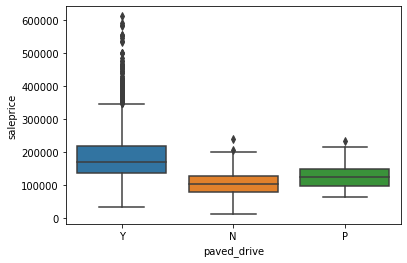

In [170]:
sns.boxplot(y=df['saleprice'],x = df['paved_drive']);

---
### wood_deck_sf

In [171]:
df[['wood_deck_sf','saleprice']].corr()

,wood_deck_sf,saleprice
wood_deck_sf,1.00000,0.30955
saleprice,0.30955,1.00000


---
### open_porch_sf

In [172]:
df[['open_porch_sf','saleprice']].corr()

,open_porch_sf,saleprice
open_porch_sf,1.000000,0.343467
saleprice,0.343467,1.000000


---
### enclosed_porch

In [173]:
df[['enclosed_porch','saleprice']].corr()

,enclosed_porch,saleprice
enclosed_porch,1.000000,-0.139772
saleprice,-0.139772,1.000000


---
### 3ssn_porch

In [174]:
df[['3ssn_porch','saleprice']].corr()

,3ssn_porch,saleprice
3ssn_porch,1.000000,0.051715
saleprice,0.051715,1.000000


---
### screen_porch

In [175]:
df[['screen_porch','saleprice']].corr()

,screen_porch,saleprice
screen_porch,1.000000,0.134469
saleprice,0.134469,1.000000


---
### pool_area

In [176]:
df[['pool_area','saleprice']].corr()

,pool_area,saleprice
pool_area,1.000000,0.023789
saleprice,0.023789,1.000000


---
### pool_qc

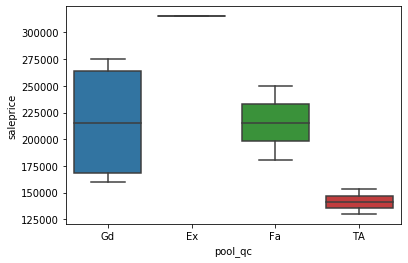

In [177]:
sns.boxplot(y=df['saleprice'],x = df['pool_qc']);

In [178]:
df['pool_qc'].value_counts(dropna=False)

NaN    1836
Gd        4
TA        2
Fa        2
Ex        1
Name: pool_qc, dtype: int64

---
### fence

In [179]:
df['fence'].value_counts(dropna=False)

NaN      1481
MnPrv     208
GdPrv      80
GdWo       69
MnWw        7
Name: fence, dtype: int64

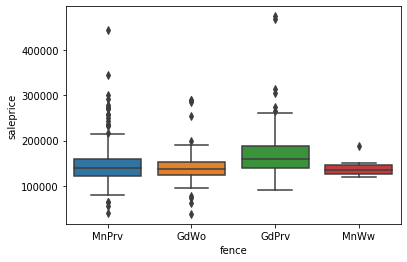

In [180]:
sns.boxplot(y=df['saleprice'],x = df['fence']);

---
### misc_feature

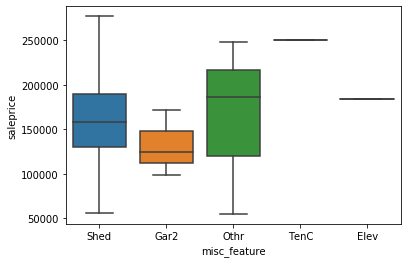

In [181]:
sns.boxplot(y=df['saleprice'],x = df['misc_feature']);

---
### misc_val

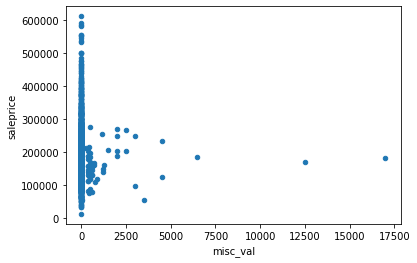

In [182]:
df.plot('misc_val','saleprice',kind='scatter');

---
### mo_sold

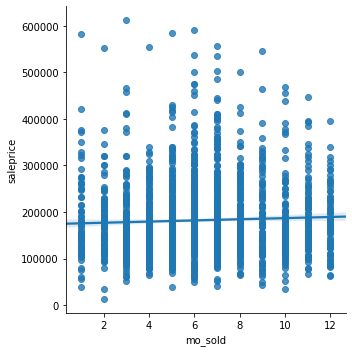

In [183]:
sns.lmplot('mo_sold','saleprice',data=df);

---
### yr_sold

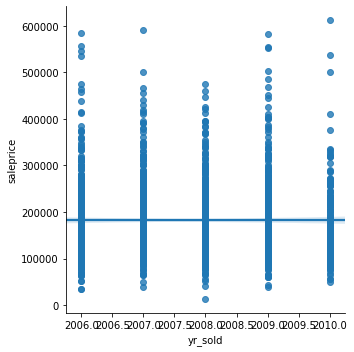

In [184]:
sns.lmplot('yr_sold','saleprice',data=df);

---
### sale_type
* New & Con higher than others

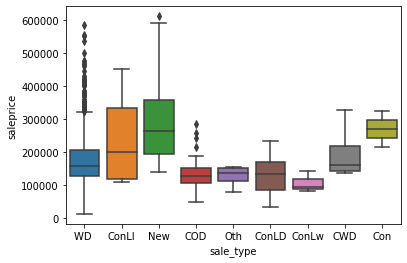

In [185]:
sns.boxplot(y=df['saleprice'],x = df['sale_type']);

---
# Feature Engineering

---
### total room area

In [186]:
df['total_sf'] = df['1st_flr_sf'] + df['2nd_flr_sf']

In [187]:
df[['total_sf','saleprice']].corr()

,total_sf,saleprice
total_sf,1.000000,0.700218
saleprice,0.700218,1.000000


In [188]:
df[['gr_liv_area','saleprice']].corr()

,gr_liv_area,saleprice
gr_liv_area,1.000000,0.691687
saleprice,0.691687,1.000000


---
### aveage room sf

* cuclated the average room area and caluate the correlation
* try treat half_bath as 1 and 0.5, compare the correlation differences

In [189]:
df['room_avg_size'] = df['total_sf'] / df['totrms_abvgrd']
df[['room_avg_size','saleprice']].corr()

,room_avg_size,saleprice
room_avg_size,1.000000,0.536716
saleprice,0.536716,1.000000


In [190]:
df['room_avg_size_2'] =  df['total_sf'] / (df['totrms_abvgrd'] + df['full_bath'] + df['half_bath'] + df['kitchen_abvgr'])
df[['room_avg_size_2','saleprice']].corr()

,room_avg_size_2,saleprice
room_avg_size_2,1.000000,0.561874
saleprice,0.561874,1.000000


In [191]:
df['room_avg_size_3'] =  df['total_sf'] / (df['totrms_abvgrd'] + df['full_bath'] + 0.5*df['half_bath'] + df['kitchen_abvgr'])
df[['room_avg_size_3','saleprice']].corr()

,room_avg_size_3,saleprice
room_avg_size_3,1.000000,0.577448
saleprice,0.577448,1.000000


In [192]:
df['bsmt_full_bath_fill'] = df['bsmt_full_bath'].fillna(0)
df['bsmt_half_bath_fill'] = df['bsmt_half_bath'].fillna(0)
df['room_avg_size_4'] =  df['total_sf'] / (df['totrms_abvgrd'] + df['full_bath'] + 0.5*df['half_bath'] + df['kitchen_abvgr'] + 0.5 * df['bsmt_full_bath_fill'] + 0.5*0.5*df['bsmt_half_bath_fill'])
df[['room_avg_size_4','saleprice']].corr()

,room_avg_size_4,saleprice
room_avg_size_4,1.000000,0.554992
saleprice,0.554992,1.000000


In [193]:
df['room_avg_size_5'] =  df['total_sf'] / (df['totrms_abvgrd'] + df['full_bath'] + 0.5*df['half_bath'])
df[['room_avg_size_5','saleprice']].corr()

,room_avg_size_5,saleprice
room_avg_size_5,1.000000,0.501806
saleprice,0.501806,1.000000


In [194]:
df[['room_avg_size_5','kitchen_abvgr']].corr()

,room_avg_size_5,kitchen_abvgr
room_avg_size_5,1.00000,-0.12122
kitchen_abvgr,-0.12122,1.00000


---
### overall qual & con
* sum all the qual to be all_qual
* sum all the con to be all con

In [138]:
df[['overall_qual','saleprice']].corr()

,overall_qual,saleprice
overall_qual,1.000000,0.795815
saleprice,0.795815,1.000000


In [202]:
# there are some na's in bsmt_qual
df['bsmt_qual'].value_counts(dropna=False)

Gd     796
TA     788
Ex     161
Fa      54
NaN     45
Po       1
Name: bsmt_qual, dtype: int64

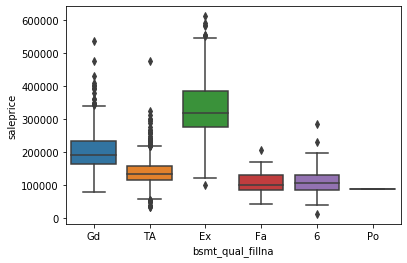

In [210]:
# fill na with 2 and the boxplots indicate NAs' saleprice's distribution is similar to Fa's, so replace NA as Fa, so does Po
df['bsmt_qual_fillna'] = df['bsmt_qual'].copy()
df['bsmt_qual_fillna'].fillna(6,inplace=True)
sns.boxplot(x= df['bsmt_qual_fillna'], y =df['saleprice']);

In [212]:
df['bsmt_qual_fillna'] = df['bsmt_qual_fillna'].map({'Po':2,'Fa':2,'TA':3,'Gd':4,'Ex':5,6:2})

In [216]:
df[['all_qual','saleprice']].corr()

,all_qual,saleprice
all_qual,1.000000,0.816411
saleprice,0.816411,1.000000


In [219]:
df['kitchen_qual_new'] = df['kitchen_qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [224]:
df['all_qual'] = df['all_qual'] + df['kitchen_qual_new']

In [225]:
df[['all_qual','saleprice']].corr()

,all_qual,saleprice
all_qual,1.000000,0.832418
saleprice,0.832418,1.000000


In [234]:
df['exter_qual'].value_counts(dropna=False)

TA    1120
Gd     628
Ex      74
Fa      23
Name: exter_qual, dtype: int64

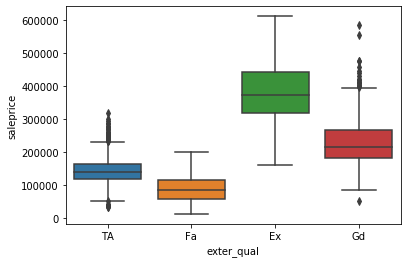

In [235]:
sns.boxplot(x= df['exter_qual'], y =df['saleprice']);

In [236]:
df['exter_qual_new'] = df['exter_qual'].map({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [238]:
df['all_qual'] = df['all_qual'] + df['exter_qual_new']
df[['all_qual','saleprice']].corr()

,all_qual,saleprice
all_qual,1.000000,0.836156
saleprice,0.836156,1.000000


* the sum of all the quality has a higher correlation with saleprice
* garage_qual is very inbalanced
* pool_qc is full of missing values, so does fence and fireplaces_quality

---
### total_baths
* after all full_bath + 0.5 half_bath + 0.5 basement full bath + 0.5*0.5 basement half bath is the best

In [239]:
df['total_baths'] = df['full_bath'] + df['half_bath']
df[['total_baths','saleprice']].corr()

,total_baths,saleprice
total_baths,1.00000,0.55311
saleprice,0.55311,1.00000


In [240]:
df['total_baths_2'] = df['full_bath'] + 0.5 * df['half_bath']
df[['total_baths_2','saleprice']].corr()

,total_baths_2,saleprice
total_baths_2,1.000000,0.578381
saleprice,0.578381,1.000000


In [241]:
df['total_baths_3'] = df['full_bath'] + 0.5*df['half_bath'] + df['bsmt_full_bath'] + 0.5 * df['bsmt_half_bath']
df[['total_baths_3','saleprice']].corr()

,total_baths_3,saleprice
total_baths_3,1.000000,0.631377
saleprice,0.631377,1.000000


In [243]:
df['total_baths_4'] = df['full_bath'] + 0.5*df['half_bath'] + 0.5* df['bsmt_full_bath'].fillna(0) + 0.5 *0.5* df['bsmt_half_bath'].fillna(0)
df[['total_baths_4','saleprice']].corr()

,total_baths_4,saleprice
total_baths_4,1.000000,0.646466
saleprice,0.646466,1.000000


In [244]:
df[['room_avg_size','total_baths_4']].corr()

,room_avg_size,total_baths_4
room_avg_size,1.000000,0.506869
total_baths_4,0.506869,1.000000
